In [1]:
import torch 
import matplotlib.pyplot as plt

# Generate data

In [2]:
def random_float_from_neg_10_to_pos_10():
  random_float = torch.rand(1) * 20 - 10
  return random_float.item()

In [3]:
true_w = random_float_from_neg_10_to_pos_10()
true_b = random_float_from_neg_10_to_pos_10()
print("True w:", true_w)
print("True bias:", true_b)

True w: -4.985569953918457
True bias: -6.348260879516602


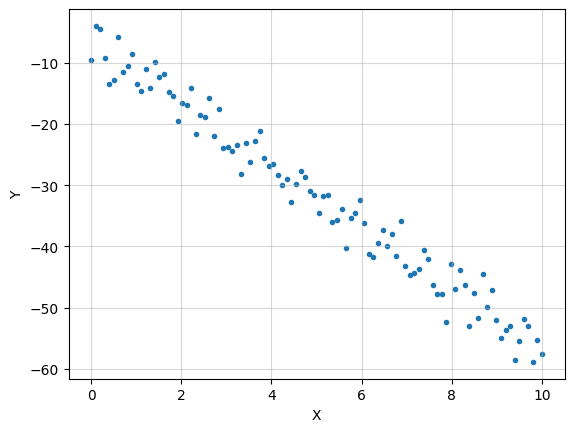

In [4]:
sample_size = 100
X = torch.linspace(start=0, end=10, steps=sample_size)

# irreducible error
noise = torch.empty(sample_size).normal_(mean=0, std=3)

Y = X * true_w + true_b + noise


plt.scatter(X, Y, marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, alpha=0.5)
plt.show()

# Handy functions and least MSE

In [5]:
# simple univariate linear regression 
def linear_reg(x, w, b):
  return x * w + b


# loss function 
def mse(y, yhat): 
  # for single case 
  return (y - yhat) ** 2


def MSE(Y, Yhat):
  # vectorization
  return mse(Y, Yhat).mean() / 2

In [6]:
Yhat = linear_reg(X, true_w, true_b)
best_loss = MSE(Y, Yhat)
best_loss

tensor(3.4690)

# Grid search

In [7]:
w_range = torch.linspace(true_w-5, true_w+5, 100)
loss = torch.empty(w_range.shape)


for i, w in enumerate(w_range):
  Yhat = linear_reg(X, w, true_b)
  loss[i] = MSE(Y, Yhat)

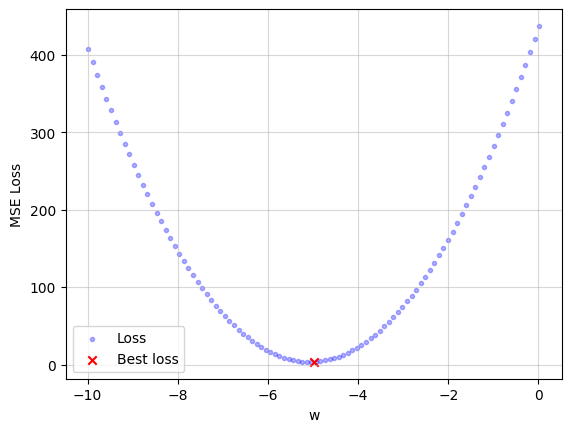

In [8]:
plt.scatter(w_range, loss, marker=".", color="b", alpha=0.3, label="Loss")
plt.scatter(true_w, best_loss, marker="x", color="r", label="Best loss")

plt.xlabel("w"); plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.5); plt.legend()
plt.show()

# Gradient descent by hand

In [9]:
print("True w:", true_w)
print("True bias:", true_b)

True w: -4.985569953918457
True bias: -6.348260879516602


In [10]:
w = torch.rand(1)
b = torch.rand(1)
print("Randomly initialized w:", w.item())
print("Randomly initialized b:", b.item())


num_epoch = 5000
learning_rate = 0.005
loss_history = []
print_freq = num_epoch // 20 

for epoch in range(1, num_epoch+1):

  # forward pass
  Yhat = linear_reg(X, w, b)

  # calculate the loss
  loss = MSE(Y, Yhat)
  loss_history.append(loss)

  # backward pass
  delta = Yhat - Y
  w -= learning_rate * torch.dot(X, delta) / X.shape[0]
  b -= learning_rate * delta.sum() / X.shape[0]

  if epoch in [1, num_epoch+1] or epoch % print_freq == 0:    
    print("Epoch: {}, Loss: {}, Current w: {}, Current b: {}".format(epoch, loss.item(), w.item(), b.item()))

Randomly initialized w: 0.04242658615112305
Randomly initialized b: 0.903464138507843
Epoch: 1, Loss: 654.73779296875, Current w: -0.9963223934173584, Current b: 0.7388279438018799
Epoch: 250, Loss: 6.349029541015625, Current w: -5.762715816497803, Current b: -1.7865198850631714
Epoch: 500, Loss: 4.946924209594727, Current w: -5.566838264465332, Current b: -3.0892434120178223
Epoch: 750, Loss: 4.193335056304932, Current w: -5.423235893249512, Current b: -4.044300079345703
Epoch: 1000, Loss: 3.788303852081299, Current w: -5.317957401275635, Current b: -4.744475841522217
Epoch: 1250, Loss: 3.570613145828247, Current w: -5.2407755851745605, Current b: -5.25778865814209
Epoch: 1500, Loss: 3.453610420227051, Current w: -5.184191703796387, Current b: -5.634109020233154
Epoch: 1750, Loss: 3.390725612640381, Current w: -5.142708778381348, Current b: -5.910001277923584
Epoch: 2000, Loss: 3.356926918029785, Current w: -5.112297058105469, Current b: -6.112260818481445
Epoch: 2250, Loss: 3.3387610

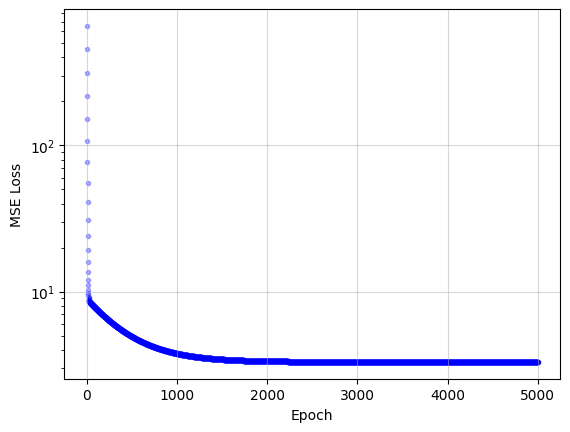

In [11]:
plt.scatter(range(num_epoch), loss_history, marker=".", color="b", alpha=0.3)

plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.5)
plt.yscale("log")
plt.show()

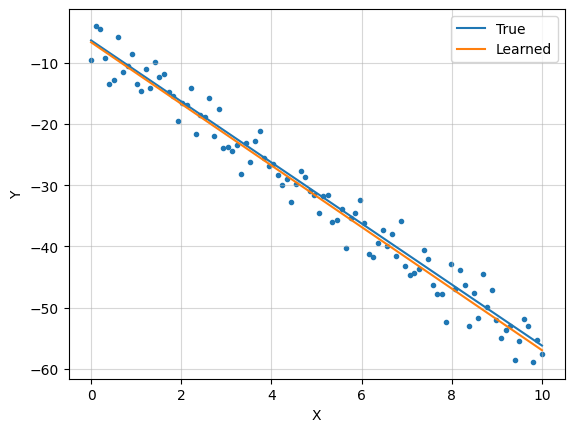

In [12]:
plt.scatter(X, Y, marker=".")
plt.plot(X, linear_reg(X, true_w, true_b), label="True")
plt.plot(X, linear_reg(X, w, b), label="Learned")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

# Auto gradient descent in PyTorch

## Auto gradient calculation

In [13]:
x = torch.tensor(10)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)
y = x * w  + b 


print("Before backpropagation")
print("Graident for x:", x.grad)
print("Graident for w:", w.grad)
print("Graident for b:", b.grad)


print("\nAfter backpropagation")
y.backward()
print("Graident for x:", x.grad)
print("Graident for w:", w.grad)
print("Graident for b:", b.grad)

Before backpropagation
Graident for x: None
Graident for w: None
Graident for b: None

After backpropagation
Graident for x: None
Graident for w: tensor(10.)
Graident for b: tensor(1.)


## Auto gradient descent: step by step

In [14]:
print("True w:", true_w)
print("True bias:", true_b)

True w: -4.985569953918457
True bias: -6.348260879516602


In [15]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
print("Randomly initialized w:", w.item())
print("Randomly initialized b:", b.item())




num_epoch = 5000
learning_rate = 0.005
loss_history = []
print_freq = num_epoch // 20 

for epoch in range(1, num_epoch+1):

  # forward pass
  Yhat = linear_reg(X, w, b)

  # calculate the loss
  loss = MSE(Yhat, Y)
  loss_history.append(loss.item())

  # backward pass
  loss.backward()
  with torch.no_grad(): 
    # previous: delta = Yhat - Y
    w -= learning_rate * w.grad # previous: torch.dot(X, delta) / X.shape[0]
    b -= learning_rate * b.grad # previous: delta.sum() / X.shape[0]
  
  # important: otherwise, gradients will accumulate!
  w.grad.zero_()
  b.grad.zero_()

  if epoch in [1, num_epoch+1] or epoch % print_freq == 0:    
    print("Epoch: {}, Loss: {}, Current w: {}, Current b: {}".format(epoch, loss.item(), w.item(), b.item()))

Randomly initialized w: 0.9323011040687561
Randomly initialized b: 0.7170030474662781
Epoch: 1, Loss: 845.9218139648438, Current w: -0.25084787607192993, Current b: 0.53105229139328
Epoch: 250, Loss: 6.0705647468566895, Current w: -5.7281928062438965, Current b: -2.016122817993164
Epoch: 500, Loss: 4.797257900238037, Current w: -5.541528701782227, Current b: -3.2575695514678955
Epoch: 750, Loss: 4.112895965576172, Current w: -5.404681205749512, Current b: -4.1677021980285645
Epoch: 1000, Loss: 3.745070219039917, Current w: -5.304354190826416, Current b: -4.834943771362305
Epoch: 1250, Loss: 3.5473766326904297, Current w: -5.2308030128479, Current b: -5.324112415313721
Epoch: 1500, Loss: 3.441121816635132, Current w: -5.176880836486816, Current b: -5.68273401260376
Epoch: 1750, Loss: 3.384012222290039, Current w: -5.137348651885986, Current b: -5.945652008056641
Epoch: 2000, Loss: 3.353318452835083, Current w: -5.108367443084717, Current b: -6.138396739959717
Epoch: 2250, Loss: 3.336821

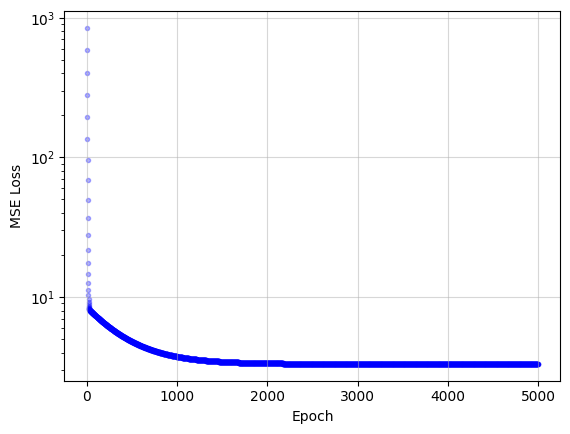

In [16]:
plt.scatter(range(num_epoch), loss_history, marker=".", color="b", alpha=0.3)

plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.5)
plt.yscale("log")
plt.show()

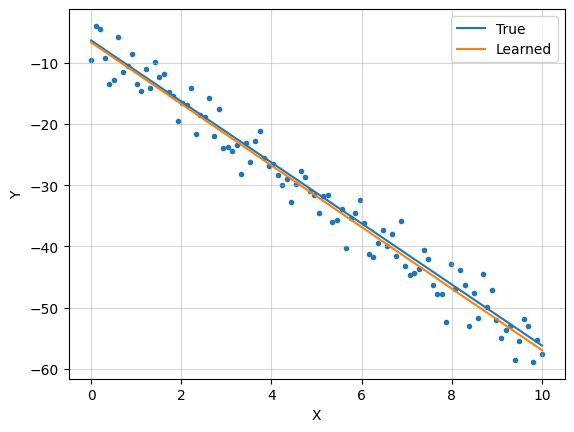

In [17]:
plt.scatter(X, Y, marker=".")
plt.plot(X, linear_reg(X, true_w, true_b), label="True")
plt.plot(X, linear_reg(X, w.item(), b.item()), label="Learned")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

## Auto gradient descent: with PyTorch built-in functions

In [18]:
import torch.nn as nn
import torch.optim as optim

### Matrix and model class (Linear)

In [19]:
model = nn.Linear(1, 1)
w, b = model.parameters()
w, b, w.shape, b.shape

(Parameter containing:
 tensor([[-0.0652]], requires_grad=True),
 Parameter containing:
 tensor([-0.3918], requires_grad=True),
 torch.Size([1, 1]),
 torch.Size([1]))

In [20]:
X.shape

torch.Size([100])

In [21]:
# uncomment and run to see the error due to dim mismatch
# model(X)

In [22]:
X2d = X.reshape(X.shape[0], 1)
Y2d = Y.reshape(Y.shape[0], 1)

In [23]:
all(linear_reg(X2d, w, b) == model(X2d))

True

### Re-training

In [24]:
print("True w:", true_w)
print("True bias:", true_b)

True w: -4.985569953918457
True bias: -6.348260879516602


In [25]:
model = nn.Linear(1, 1)

num_epoch = 5000
loss_history = []
print_freq = num_epoch // 20

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)


for epoch in range(1, num_epoch+1):

  optimizer.zero_grad()

  # forward pass
  Yhat = model(X2d)

  # calculate loss 
  loss = criterion(Y2d, Yhat) # previous: MSE(Y2d, Yhat)
  loss_history.append(loss.item())

  # backward pass
  loss.backward() 
  optimizer.step() 

  if epoch in [1, num_epoch+1] or epoch % print_freq == 0:    
    w, b = model.parameters()
    print("Epoch: {}, Loss: {}, Current w: {}, Current b: {}".format(epoch, loss, w.item(), b.item()))

Epoch: 1, Loss: 1501.0748291015625, Current w: -1.570008397102356, Current b: -0.5393933653831482
Epoch: 250, Loss: 8.860987663269043, Current w: -5.472904205322266, Current b: -3.7139692306518555
Epoch: 500, Loss: 7.277747631072998, Current w: -5.267378807067871, Current b: -5.080859184265137
Epoch: 750, Loss: 6.820745468139648, Current w: -5.156958103179932, Current b: -5.815232276916504
Epoch: 1000, Loss: 6.6888322830200195, Current w: -5.097633361816406, Current b: -6.209783554077148
Epoch: 1250, Loss: 6.650754928588867, Current w: -5.065760135650635, Current b: -6.421761512756348
Epoch: 1500, Loss: 6.639763832092285, Current w: -5.048635959625244, Current b: -6.53564977645874
Epoch: 1750, Loss: 6.636590480804443, Current w: -5.039436340332031, Current b: -6.596836566925049
Epoch: 2000, Loss: 6.635674476623535, Current w: -5.034493446350098, Current b: -6.629710674285889
Epoch: 2250, Loss: 6.635410308837891, Current w: -5.031837463378906, Current b: -6.647373199462891
Epoch: 2500, 

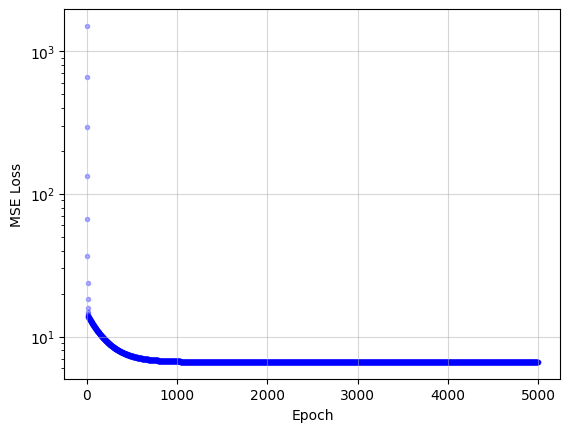

In [26]:
plt.scatter(range(num_epoch), loss_history, marker=".", color="b", alpha=0.3)

plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.5)
plt.yscale("log")
plt.show()

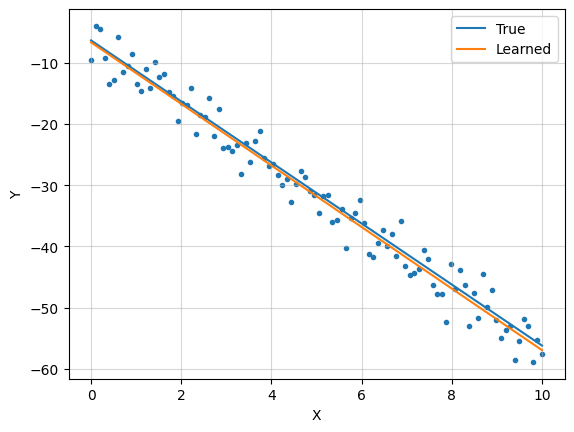

In [27]:
plt.scatter(X, Y, marker=".")
plt.plot(X, linear_reg(X, true_w, true_b), label="True")
plt.plot(X, linear_reg(X, w.item(), b.item()), label="Learned")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

# More standard-ish way of bulding and training neural network

In [28]:
class LinearReg(nn.Module):

  def __init__(self, in_dim, out_dim):
    super(LinearReg, self).__init__()
    self.linear = nn.Linear(in_dim, out_dim)

  def forward(self, X):
    return self.linear(X)


def train_loop(model, X, Y, optimizer, criterion):
  model.train() # training mode

  optimizer.zero_grad()
  logits = model(X) # forward 
  loss = criterion(logits, Y) # loss
  loss.backward() # backward
  optimizer.step() # update weights 

  return loss

In [29]:
print("True w:", true_w)
print("True bias:", true_b)

True w: -4.985569953918457
True bias: -6.348260879516602


In [30]:
model = LinearReg(1, 1)

num_epoch = 5000
loss_history = []
print_freq = num_epoch // 20 
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)


for epoch in range(1, num_epoch+1):

  loss = train_loop(model, X2d, Y2d, optimizer, criterion)
  loss_history.append(loss.item())


  if epoch in [1, num_epoch+1] or epoch % print_freq == 0:    
    w, b = model.parameters()
    print("Epoch: {}, Loss: {}, Current w: {}, Current b: {}".format(epoch, loss, w.item(), b.item()))

Epoch: 1, Loss: 1214.6717529296875, Current w: -1.9962100982666016, Current b: -0.6590399146080017
Epoch: 250, Loss: 8.817107200622559, Current w: -5.468504428863525, Current b: -3.7432327270507812
Epoch: 500, Loss: 7.265084266662598, Current w: -5.265015125274658, Current b: -5.096578598022461
Epoch: 750, Loss: 6.817088603973389, Current w: -5.155688285827637, Current b: -5.823678970336914
Epoch: 1000, Loss: 6.687777519226074, Current w: -5.096951007843018, Current b: -6.214320659637451
Epoch: 1250, Loss: 6.650451183319092, Current w: -5.065393924713135, Current b: -6.424200534820557
Epoch: 1500, Loss: 6.639676094055176, Current w: -5.048439025878906, Current b: -6.536960124969482
Epoch: 1750, Loss: 6.636565685272217, Current w: -5.03933048248291, Current b: -6.597541332244873
Epoch: 2000, Loss: 6.635667324066162, Current w: -5.034436225891113, Current b: -6.630089282989502
Epoch: 2250, Loss: 6.635408878326416, Current w: -5.031806945800781, Current b: -6.647575855255127
Epoch: 2500, 

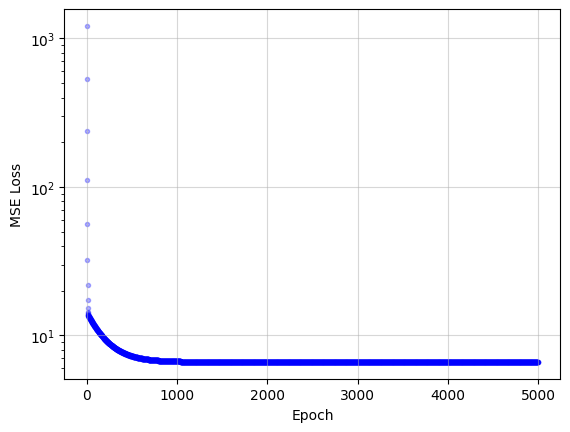

In [31]:
plt.scatter(range(num_epoch), loss_history, marker=".", color="b", alpha=0.3)

plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.5)
plt.yscale("log")
plt.show()

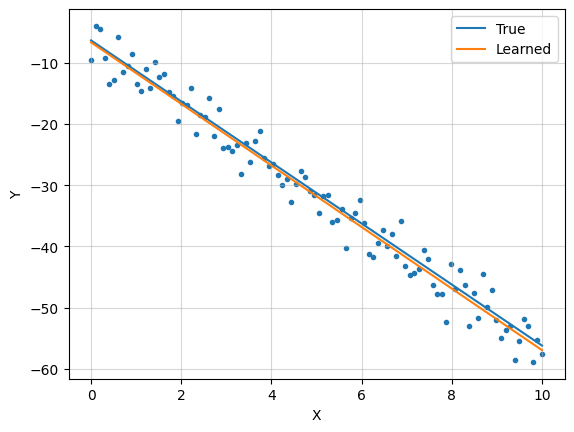

In [32]:
plt.scatter(X, Y, marker=".")
plt.plot(X, linear_reg(X, true_w, true_b), label="True")
plt.plot(X, linear_reg(X, w.item(), b.item()), label="Learned")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()